# 使用PCA降噪

## 回忆我们之前的例子

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 5., size=100)

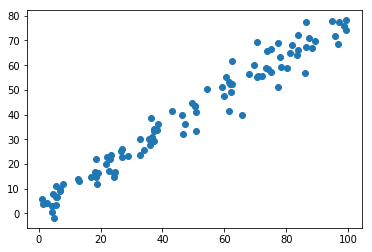

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.show()

实际有可能是一种情况：真实数据应该是一条直线，但由于各种原因（例如测量仪器的问题）造成数据在直线周围抖动

In [4]:
from sklearn.decomposition.pca import PCA

pca = PCA(n_components=1)
pca.fit(X)
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)

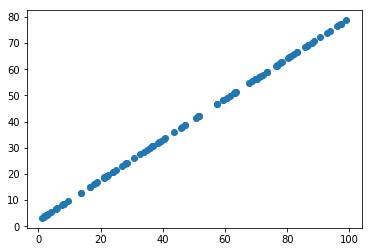

In [6]:
plt.scatter(X_restore[:,0], X_restore[:,1])
plt.show()

上边的两个图，完全可以理解为第一个图到第二个图就是把噪音完全去除

## 再举一个手写识别的例子

In [7]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [8]:
# 加点噪音
noisy_digits = X + np.random.normal(0, 4, size=X.shape)

### 为了方便理解这些噪音，我们来绘制一下这些数字

In [9]:
example_digits = noisy_digits[y==0,:][:10]
np.shape(example_digits)

(10, 64)

In [14]:
for num in range(1,10):
    X_num = noisy_digits[y==num,:][:10]
    example_digits = np.vstack([example_digits, X_num])
np.shape(example_digits)

(100, 64)

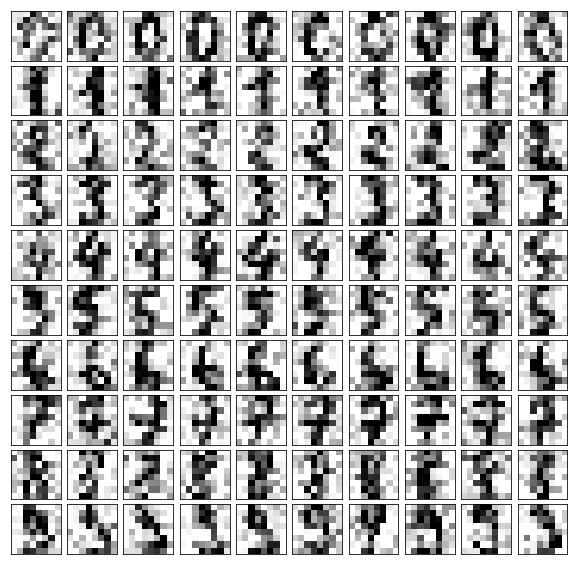

In [16]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10,10), 
                            subplot_kw={'xticks':[], 'yticks':[]}, 
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8), cmap='binary', interpolation='nearest', clim=(0,16))
    plt.show()
    
plot_digits(example_digits)

可以看到噪音非常明显，下面我们用PCA进行降噪，看看显示效果

In [17]:
pca = PCA(0.5)

pca.fit(noisy_digits)

pca.n_components_

12

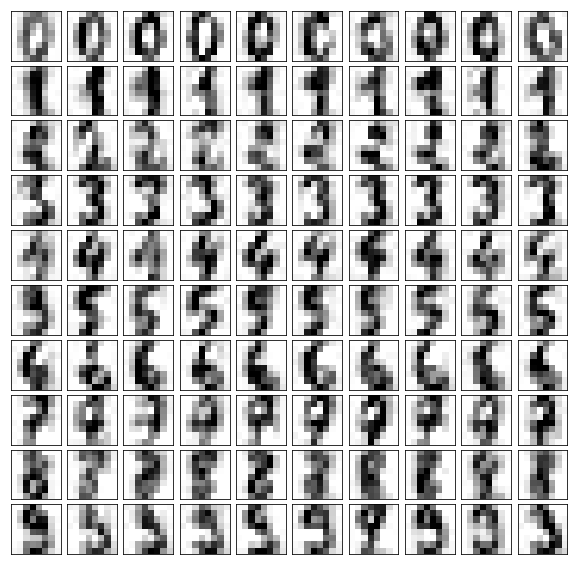

In [18]:
components = pca.transform(example_digits)
filtered_digits = pca.inverse_transform(components)

plot_digits(filtered_digits)